### readme:

处理来自s_1的cat_galaxies.csv

进行KDE

输出：附带data_used_z_le_4.csv
含归一化KDE的data_select_for_analyse.csv，且已通过坐标以及红移限定，用于减弱边缘效应

data_ori_z_05_35_sort_by_mpc.csv待研究数据
data_used_z_le_4.csv:背景数据


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from astropy.coordinates import SkyCoord
import seaborn as seaborn
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import Planck15 as cosmo

原始数据名称：data

In [9]:
data=pd.read_csv('cat_galaxies.csv')

In [10]:
data

,ID,RA,DEC,X_IMAGE,Y_IMAGE,HSC_g_FLUXERR_APER3,HSC_g_MAG_APER3,HSC_g_MAGERR_APER3,HSC_r_FLUXERR_APER3,HSC_r_MAG_APER3,...,lp_mass_med_max68,lp_mass_best,lp_SFR_med,CFHT_ustar_FLUX,CFHT_u_FLUX,HSC_g_FLUX,HSC_r_FLUX,HSC_i_FLUX,HSC_z_FLUX,HSC_y_FLUX
0,3,151.007706,1.398440,1324.814453,2583.007812,0.023519,22.982735,0.011828,0.035256,22.093363,...,9.78739,9.56427,1.37472,NaN,2.732837e-28,2.067557e-28,1.831765e-28,1.865642e-28,1.797653e-28,1.698847e-28
1,4,150.162372,1.391619,21610.509766,2415.219971,0.013831,26.292122,0.144115,0.023258,26.584515,...,8.98262,9.03577,-0.25843,2.766080e-28,3.182957e-28,2.631855e-28,2.462828e-28,2.693095e-28,NaN,2.488792e-28
2,5,149.540181,1.391537,36540.632812,2414.936523,0.013743,26.729622,0.214083,0.020104,27.673620,...,8.46359,6.96711,-0.53060,2.765548e-28,3.147518e-28,2.685367e-28,2.572332e-28,2.600692e-28,2.449415e-28,2.508847e-28
3,6,149.437345,1.391497,39008.519531,2414.636963,0.015206,25.851416,0.104765,0.021549,25.412966,...,8.76033,8.71776,-0.06422,2.557542e-28,2.910301e-28,2.580856e-28,2.348355e-28,2.526174e-28,2.496719e-28,2.306917e-28
4,8,150.220551,1.391629,20214.474609,2415.494629,0.013411,26.187609,0.127062,0.021122,27.609510,...,8.87457,8.14892,-0.11070,2.855727e-28,3.305262e-28,2.641965e-28,2.576150e-28,2.670308e-28,2.689286e-28,2.413423e-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382876,1720694,149.118189,3.071524,46641.445312,42746.996094,0.007029,27.635874,0.256348,0.008685,27.207603,...,9.49189,9.55996,0.38834,2.629548e-28,2.990380e-28,2.748357e-28,2.504323e-28,2.631131e-28,2.489141e-28,2.429528e-28
1382877,1720695,149.175224,3.071116,45274.011719,42735.953125,0.015580,27.245588,0.397415,0.020326,27.884813,...,9.45598,9.39608,0.69481,2.988961e-28,3.607583e-28,2.691654e-28,2.550099e-28,2.647526e-28,2.562931e-28,NaN
1382878,1720696,149.100737,3.071032,47059.863281,42735.585938,0.016801,28.121548,0.957539,0.021261,27.524418,...,9.63053,9.66641,0.34964,2.879971e-28,3.251355e-28,2.780972e-28,2.518967e-28,2.561238e-28,2.458984e-28,2.344014e-28
1382879,1720697,149.073683,3.071523,47708.503906,42747.988281,0.006369,29.839119,1.762525,0.008064,NaN,...,10.43651,8.08085,0.92270,3.258110e-28,3.593665e-28,3.225550e-28,NaN,2.945503e-28,2.819180e-28,2.655389e-28


In [11]:
# 去掉红移为nan的行
data.dropna(axis=0,subset=['photoz'],inplace=True)

data.drop(['Unnamed: 0','IRAC_CH1_MAG','IRAC_CH2_MAG','IRAC_CH1_FLUX','IRAC_CH2_FLUX','IRAC_CH1_FLUXERR','IRAC_CH2_FLUXERR','IRAC_CH1_MAGERR','IRAC_CH2_MAGERR'],axis=1,inplace=True)

KeyError: "['Unnamed: 0', 'IRAC_CH1_MAG', 'IRAC_CH2_MAG', 'IRAC_CH1_FLUXERR', 'IRAC_CH2_FLUXERR', 'IRAC_CH1_MAGERR', 'IRAC_CH2_MAGERR'] not found in axis"

Text(0, 0.5, 'DEC')

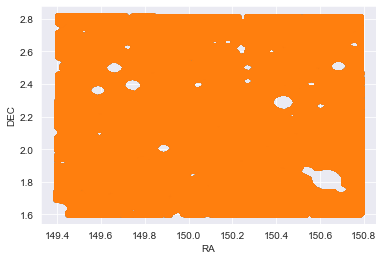

In [12]:
r=0.80

ra_max,ra_min=np.max(data['RA']),np.min(data['RA'])
dec_max,dec_min=np.max(data['DEC']),np.min(data['DEC'])

rr=np.abs(ra_max-ra_min)*(1-r)
dd=np.abs(dec_max-dec_min)*(1-r)

# data_used=data[(ra_max-rr > data['RA']) & (data['RA'] > (ra_min+rr)) & (data['DEC']<dec_max-rr) & (data['DEC'] > (dec_min+rr))]
data_used=data

plt.scatter(data['RA'],data['DEC'])     # 所有数据的分布
plt.scatter(data_used['RA'],data_used['DEC'])     # 研究区域数据的分布

plt.xlabel('RA')
plt.ylabel('DEC')

In [13]:
# print(min(data_used['RA']))
# print(min(data_used['DEC']))
# print(max(data_used['RA']))
# print(max(data_used['DEC']))

print(np.abs(max(data_used['RA']-min(data_used['RA']))))
print(np.abs(max(data_used['DEC']-min(data_used['DEC']))))

1.3888546818392058
1.2127529162386717


In [14]:
# 限定红移z<4
data_used_z_le_4=data_used[data_used['photoz']<4]

In [15]:
len(data_used)

711918

In [16]:
len(data_used_z_le_4)

682079

### KDE

In [16]:
# 将球面坐标转为直角坐标，以使用KDE

def trans(ra_, dec_, distance_):

    ra_,dec_=ra_*np.pi/180,dec_*np.pi/180

    x_ = distance_*(np.cos(ra_) * np.cos(dec_))
    y_ = distance_*(np.sin(ra_) * np.cos(dec_))
    z_ = distance_*(np.sin(dec_))

    return np.array([x_,y_,z_])

In [17]:
photoz=np.array(data_used_z_le_4['photoz'])
data_used_z_le_4['comoving_radial_distance_mpc']= cosmo.comoving_distance(photoz).value

C:\Users\LiYibo\AppData\Local\Temp\ipykernel_10332\1531439295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used_z_le_4['comoving_radial_distance_mpc']= cosmo.comoving_distance(photoz).value


In [ ]:
# 核密度估计：

ra,dec,distance = data_used_z_le_4['RA'],data_used_z_le_4['DEC'],data_used_z_le_4['comoving_radial_distance_mpc']

data=trans(ra,dec,distance)


values_ = data
# kde = stats.gaussian_kde(values_, bw_method='silverman')
kde = stats.gaussian_kde(values_,bw_method=0.08)
density = kde(values_)

In [15]:
data_used_z_le_4['kde']=density
data_used_z_le_4['kde_normalisation']=data_used_z_le_4['kde']/max(data_used_z_le_4['kde'])
data_used_z_le_4['x']=data[0]
data_used_z_le_4['y']=data[1]
data_used_z_le_4['z']=data[2]

C:\Users\LiYibo\AppData\Local\Temp\ipykernel_12148\1824167365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used_z_le_4['kde']=density
C:\Users\LiYibo\AppData\Local\Temp\ipykernel_12148\1824167365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used_z_le_4['kde_normalisation']=data_used_z_le_4['kde']/max(data_used_z_le_4['kde'])
C:\Users\LiYibo\AppData\Local\Temp\ipykernel_12148\1824167365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [16]:
data_used_z_le_4.to_csv('data_used_z_le_4.csv',index=False)

In [17]:
# data_used_z_le_4=pd.read_csv('data_used_z_le_4.csv')

(array([17916., 17914., 19110., 25941., 25685., 20347., 19096., 22113.,
        28845., 30260., 27368., 27076., 24429., 24125., 21491., 22060.,
        15128., 16266., 15896., 13355., 13175., 14677., 17071., 16536.,
        16070., 12364., 10360.,  9367.,  9120.,  8998.,  9002., 10090.,
         8755.,  8312.,  7979.,  6774.,  7191.,  6751.,  6626.,  6059.,
         5397.,  5022.,  4739.,  4710.,  4759.,  4383.,  4194.,  3527.,
         2735.,  2915.]),
 array([0.01    , 0.089798, 0.169596, 0.249394, 0.329192, 0.40899 ,
        0.488788, 0.568586, 0.648384, 0.728182, 0.80798 , 0.887778,
        0.967576, 1.047374, 1.127172, 1.20697 , 1.286768, 1.366566,
        1.446364, 1.526162, 1.60596 , 1.685758, 1.765556, 1.845354,
        1.925152, 2.00495 , 2.084748, 2.164546, 2.244344, 2.324142,
        2.40394 , 2.483738, 2.563536, 2.643334, 2.723132, 2.80293 ,
        2.882728, 2.962526, 3.042324, 3.122122, 3.20192 , 3.281718,
        3.361516, 3.441314, 3.521112, 3.60091 , 3.680708, 3.760506

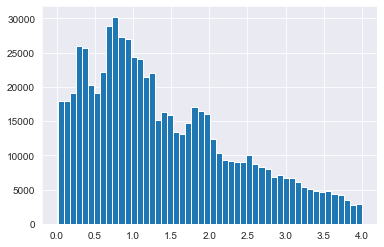

In [18]:
plt.hist(data_used_z_le_4['photoz'],bins=50)

### 选择中心区域以减小边缘效应

In [34]:
'''
a=d/4

data_select=data_used_z_le_4[(data_used_z_le_4['RA']>(data_used_z_le_4['RA'].min()+a)) & (data_used_z_le_4['RA']<(data_used_z_le_4['RA'].max()-a)) & (data_used_z_le_4['DEC']>(data_used_z_le_4['DEC'].min()+a)) & (data_used_z_le_4['DEC']<(data_used_z_le_4['DEC'].max()-a))]
'''

r=0.80

ra_max,ra_min=max(data_used['RA']),min(data_used['RA'])
dec_max,dec_min=max(data_used['DEC']),min(data_used['DEC'])

In [35]:
rr=np.abs(ra_max-ra_min)*(1-r)
dd=np.abs(dec_max-dec_min)*(1-r)

data_select=data_used_z_le_4[((ra_max-rr > data_used_z_le_4['RA']) & (data_used_z_le_4['RA'] > (ra_min+rr)) & (data_used_z_le_4['DEC']<dec_max-rr) & (data_used_z_le_4['DEC'] > (dec_min+rr)))]   # 坐标限定

In [36]:
data_select=data_select[(0.5<data_select['photoz'])&(3.5>data_select['photoz'])]    #红移限定

In [37]:
ra_=max(data_select['RA'])-min(data_select['RA'])
dec_=max(data_select['DEC'])-min(data_select['DEC'])

print('information about area to be study:\n\ndata_select:\n')
print('Square: {:.3f} * {:.3f}'.format(ra_,dec_))

print('{:5f} < RA < {:.5f}'.format(min(data_select['RA']),max(data_select['RA'])))
print('{:.5f} < DEC < {:.5f}'.format(min(data_select['DEC']),max(data_select['DEC'])))

print('{} galaxies in total'.format(len(data_select)))

information about area to be study:

data_select:

Square: 0.833 * 0.657
149.675000 < RA < 150.50829
1.88104 < DEC < 2.53822
105059 galaxies in total


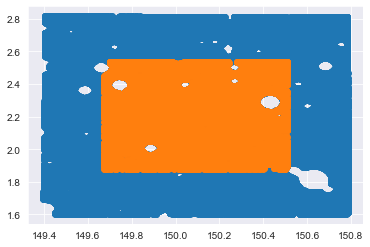

In [38]:
plt.scatter(data_used['RA'],data_used['DEC'])
plt.scatter(data_select['RA'],data_select['DEC'])

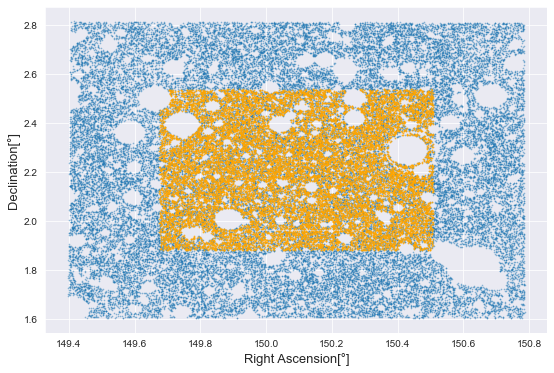

In [31]:
plt.figure(figsize=(9,6))

# a=np.random.randint(0,len(data_used['RA']),size=int(0.08*len(data_used['RA'])))
# plt.scatter(np.array(data_used['RA'])[a],np.array(data_used['DEC'])[a],alpha=0.3,s=0.4)

a=np.random.randint(0,len(data_used['RA']),size=int(0.08*len(data_used['RA'])))
plt.scatter(np.array(data_used['RA'])[a],np.array(data_used['DEC'])[a],alpha=0.4,s=0.5)

a=np.random.randint(0,len(data_select['RA']),size=int(0.08*len(data_select['RA'])))
plt.scatter(np.array(data_select['RA'])[a],np.array(data_select['DEC'])[a],alpha=0.7,s=0.7,c='orange')

plt.xlabel('Right Ascension[°]',fontsize=13)
plt.ylabel('Declination[°]',fontsize=13)
plt.savefig('range.png',dpi=200)

### 数据分析

In [36]:
tem=data_select.sort_values('comoving_radial_distance_mpc',ascending=True)

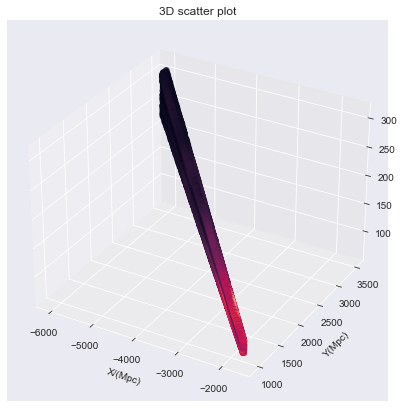

In [37]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(tem['x'],tem['y'],tem['z'], c=tem['kde'])
plt.title("3D scatter plot")
plt.xlabel('X/(Mpc)')
plt.ylabel('Y(Mpc)')

plt.show()

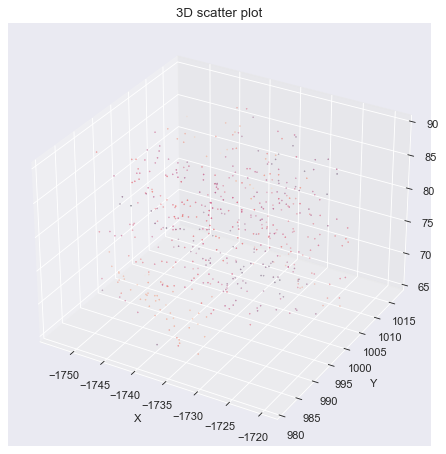

In [39]:
tem=data_select.sort_values('comoving_radial_distance_mpc',ascending=True).iloc[1000:1500]


fig = plt.figure(figsize = (10, 7),dpi=80)
ax = plt.axes(projection ="3d")
ax.scatter3D(tem['x'],tem['y'],tem['z'],c=tem['kde'],s=0.1)
plt.title("3D scatter plot")
plt.xlabel('X')
plt.ylabel('Y')


plt.show()

In [39]:
# data_select.to_csv('data_select_for_analyse.csv',index=False)
data_ori_z_05_35_sort_by_mpc=data_select.sort_values('comoving_radial_distance_mpc',ascending=True)
data_ori_z_05_35_sort_by_mpc.to_csv('data_ori_z_05_35_sort_by_mpc.csv',index=False)

Text(0, 0.5, 'Declination[°]')

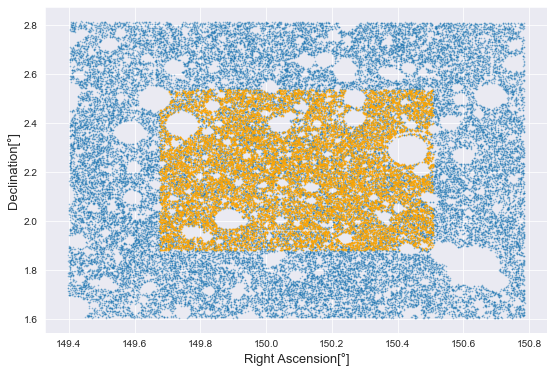

In [55]:
plt.figure(figsize=(9,6))

# a=np.random.randint(0,len(data_used['RA']),size=int(0.08*len(data_used['RA'])))
# plt.scatter(np.array(data_used['RA'])[a],np.array(data_used['DEC'])[a],alpha=0.3,s=0.4)

a=np.random.randint(0,len(data_used_z_le_4['RA']),size=int(0.08*len(data_used_z_le_4['RA'])))
plt.scatter(np.array(data_used_z_le_4['RA'])[a],np.array(data_used_z_le_4['DEC'])[a],alpha=0.4,s=0.5)

a=np.random.randint(0,len(data_ori_z_05_35_sort_by_mpc['RA']),size=int(0.08*len(data_ori_z_05_35_sort_by_mpc['RA'])))
plt.scatter(np.array(data_ori_z_05_35_sort_by_mpc['RA'])[a],np.array(data_ori_z_05_35_sort_by_mpc['DEC'])[a],alpha=0.7,s=0.7,c='orange')

plt.xlabel('Right Ascension[°]',fontsize=13)
plt.ylabel('Declination[°]',fontsize=13)